# Terminology

## Overview

| **Terminology**              | **Definition / Description**                                                                 | **Usage Example**                                              | **Formula** |
|------------------------------|----------------------------------------------------------------------------------------------|----------------------------------------------------------------|-------------|
| **Mean (Average)**           | Sum of all values divided by the number of values.                                           | Average revenue per user.                                      | $\mu = \frac{1}{n}\sum_{i=1}^{n} x_i$ |
| **Median**                   | Middle value when data is sorted (or avg. of two middle values).                             | Typical household income (robust to outliers).                 | – |
| **Mode**                     | Most frequently occurring value in a dataset.                                                | Most common product size ordered.                              | – |
| **Range / Spread**           | Difference between maximum and minimum values.                                               | Revenue variability in a week.                                 | $\text{Range} = \max(x) - \min(x)$ |
| **Deviation**                | Difference of each observation from the mean.                                                | How far each student’s score is from class average.            | $d_i = x_i - \mu$ |
| **Variance**                 | Average squared deviation from the mean (measures spread).                                   | Comparing volatility of two investments.                       | $\sigma^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i - \mu)^2$ |
| **Standard Deviation (SD)**  | Square root of variance; spread in same units as data.                                       | Customer spending variability.                                 | $\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i - \mu)^2}$ |
| **Normal Distribution**      | Bell-shaped, symmetric distribution defined by mean and variance.                            | Modeling test scores, noise, heights.                          | $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{ -\frac{(x-\mu)^2}{2\sigma^2} }$ |
| **Percentile**               | Value below which a given % of observations fall.                                            | 90th percentile income = “top 10% earners”.                    | – |
| **Quartiles**                | Special percentiles that split data into 4 equal parts (Q1=25%, Q2=50%, Q3=75%).             | Comparing median vs. spread of salaries.                       | – |
| **Interquartile Range (IQR)**| Middle 50% of data = Q3 − Q1.                                                                | Robust spread measure for skewed data.                         | $\text{IQR} = Q_3 - Q_1$ |
| **z-score / z-value**        | Standardized value: how many SDs away from mean.                                             | Compare student’s score across different tests.                | $z = \frac{x - \mu}{\sigma}$ |
| **Standard Error (SE)**      | SD of the sample mean distribution.                                                          | Precision of estimated average revenue per user.                | $SE = \frac{\sigma}{\sqrt{n}}$ |
| **Confidence Interval (CI)** | Range around an estimate likely to contain true population parameter.                         | “95% CI for mean income is [45k, 55k].”                         | $\bar{x} \pm z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}$ |
| **Covariance**               | Measure of how two variables vary together.                                                  | Height vs. weight relationship.                                | $\text{Cov}(X,Y) = \frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$ |
| **Correlation (Pearson’s r)**| Standardized covariance (−1 to +1).                                                          | Relationship between ad spend and revenue.                      | $r = \frac{\text{Cov}(X,Y)}{\sigma_X \sigma_Y}$ |
| **p-value**                  | Probability of observing data at least as extreme under the null hypothesis.                 | A/B test: p < 0.05 means reject H₀ (stat. significance).       | $p = P(T \geq t_{\text{obs}} \mid H_0)$ |
| **t-statistic**              | Ratio of difference from null to standard error.                                             | Hypothesis test of mean difference.                            | $t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}}$ |
| **Degrees of Freedom (df)**  | Number of independent values in a calculation.                                               | t-test, chi-square test.                                       | $df = n - 1$ (one-sample mean test) |
| **Chi-Square (χ²)**          | Tests independence between categorical variables.                                            | Test if campaign response depends on gender.                   | $\chi^2 = \sum \frac{(O - E)^2}{E}$ |

## Mini-Visuals

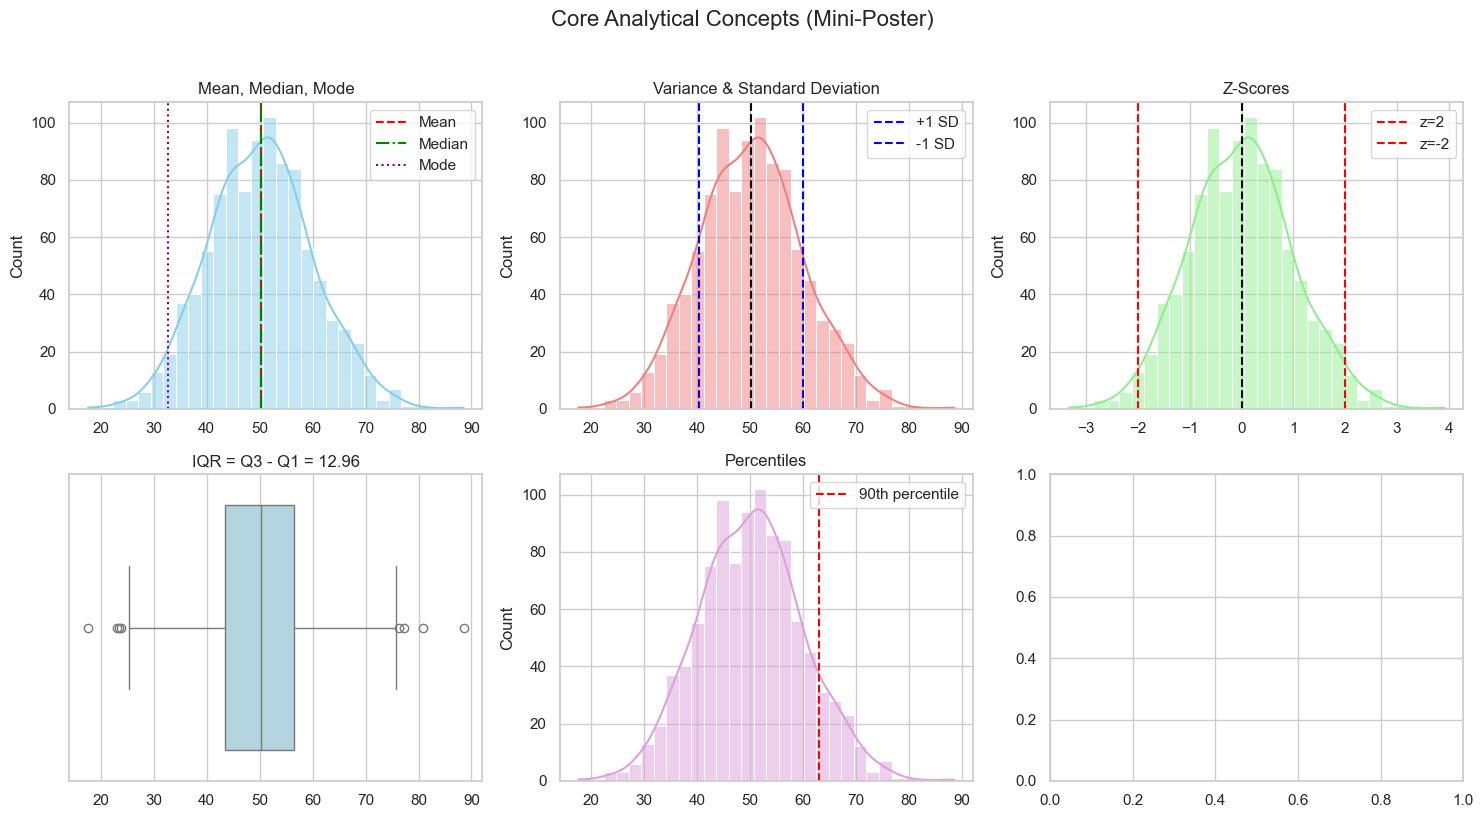

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

# Generate data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=1000)

# Prepare figure with 2 rows × 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# --- 1. Mean, Median, Mode ---
sns.histplot(data, bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].axvline(np.mean(data), color="red", linestyle="--", label="Mean")
axes[0].axvline(np.median(data), color="green", linestyle="-.", label="Median")
# Approx mode = peak of histogram
mode_val = data[np.argmax(np.histogram(data, bins=30)[0])]
axes[0].axvline(mode_val, color="purple", linestyle=":", label="Mode")
axes[0].set_title("Mean, Median, Mode")
axes[0].legend()

# --- 2. Variance & Standard Deviation ---
sns.histplot(data, bins=30, kde=True, ax=axes[1], color="lightcoral")
mean = np.mean(data)
std = np.std(data)
axes[1].axvline(mean, color="black", linestyle="--")
axes[1].axvline(mean + std, color="blue", linestyle="--", label="+1 SD")
axes[1].axvline(mean - std, color="blue", linestyle="--", label="-1 SD")
axes[1].set_title("Variance & Standard Deviation")
axes[1].legend()

# --- 3. Z-Scores ---
z_scores = (data - mean) / std
sns.histplot(z_scores, bins=30, kde=True, ax=axes[2], color="lightgreen")
axes[2].axvline(0, color="black", linestyle="--")
axes[2].axvline(2, color="red", linestyle="--", label="z=2")
axes[2].axvline(-2, color="red", linestyle="--", label="z=-2")
axes[2].set_title("Z-Scores")
axes[2].legend()

# --- 4. Interquartile Range (IQR) ---
sns.boxplot(x=data, ax=axes[3], color="lightblue")
q1, q3 = np.percentile(data, [25, 75])
axes[3].set_title(f"IQR = Q3 - Q1 = {q3 - q1:.2f}")

# --- 5. Percentiles ---
sns.histplot(data, bins=30, kde=True, ax=axes[4], color="plum")
p90 = np.percentile(data, 90)
axes[4].axvline(p90, color="red", linestyle="--", label="90th percentile")
axes[4].set_title("Percentiles")
axes[4].legend()

plt.suptitle("Core Analytical Concepts (Mini-Poster)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Deepdive
## z-value, z-Score

> A z-score tells you how many standard deviations a data point is from the mean of a normal distribution.
> It quantifies how far a data point is from the mean (average) of a dataset, in terms of standard deviations. 

The z-value (test statistic) is a summary number computed from *all* your observations. It measures how far your observed difference (uplift) is from 0 (the null hypothesis), in units of standard errors.

Once you have your z-value, you ask:
* “If H₀ were true (uplift = 0), how often would a z-value this extreme appear just by chance?”
* That tail probability = the p-value.
* If it’s less than α (e.g., 0.05), then the observed difference is unlikely to be just random noise → statistically significant.

## p-value
A hypothesis test tries to assess whether a difference (here observed values) is likely not due simply to chance. The hypothesis test is (in most cases) based on a the p-value, which gives a limit on the probability that the difference is likely not due to chance. If this value is below a threshold (often 5%), then the hypothesis test concludes that the difference is likely not due to chance.

> The p-value is the probability, under the assumption that the null hypothesis (H₀) is true, of observing a test statistic (like your z-value) at least as extreme as the one you actually got.

* Suppose under H₀ (no uplift), the null distribution of z-scores is the standard normal (mean = 0, σ = 1).
* You observe z = 2.44.
* The p-value = **area** under the null curve **to the right of 2.44**.
* That area ≈ 0.007 → meaning: If there was truly no difference, only 0.7% of experiments would show a result this extreme just by chance.

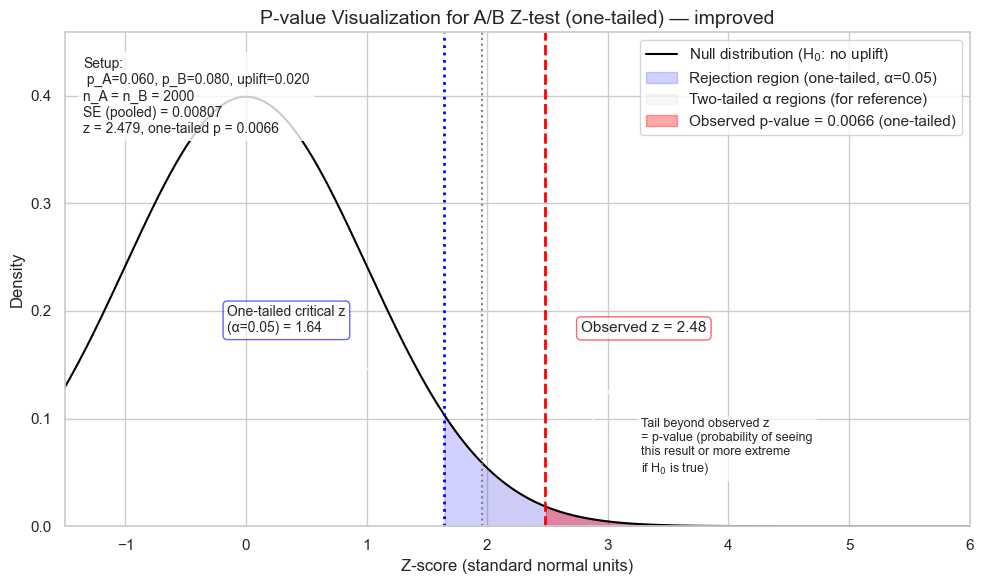

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

plt.rcParams["font.family"] = "DejaVu Sans"
sns.set(style="whitegrid")

# Example: z-statistic from AB test (pooled test)
uplift = 0.02
p_A, p_B = 0.06, 0.08
n_A = n_B = 2000

# Pooled SE for hypothesis test (one-tailed)
p_pool = (p_A*n_A + p_B*n_B) / (n_A+n_B)
SE_pooled = np.sqrt(p_pool*(1-p_pool)*(1/n_A+1/n_B))

z_stat = uplift / SE_pooled
p_value = 1 - norm.cdf(z_stat)  # one-tailed test B > A

# Critical values
alpha = 0.05
z_alpha_one = norm.ppf(1 - alpha)      # one-tailed critical
z_alpha_two = norm.ppf(1 - alpha/2)    # two-tailed critical (for reference)

# x range centered more on relevant area
x = np.linspace(-4, 6, 1000)
y = norm.pdf(x, 0, 1)

fig, ax = plt.subplots(figsize=(10,6))

# Null distribution curve
ax.plot(x, y, color="black", lw=1.5, label="Null distribution (H$_0$: no uplift)")

# Shade rejection region (one-tailed, alpha)
ax.fill_between(x, 0, y, where=(x >= z_alpha_one), color='blue', alpha=0.18, label=f"Rejection region (one-tailed, α={alpha})")
# Shade two-tailed critical regions lightly for context
ax.fill_between(x, 0, y, where=(x <= -z_alpha_two) | (x >= z_alpha_two), color='gray', alpha=0.06, label="Two-tailed α regions (for reference)")

# Shade p-value area (tail beyond observed z)
ax.fill_between(x, 0, y, where=(x >= z_stat), color='red', alpha=0.35, label=f"Observed p-value = {p_value:.4f} (one-tailed)")

# Vertical lines for statistics
ax.axvline(z_stat, color='red', linestyle='--', lw=2)
ax.axvline(z_alpha_one, color='blue', linestyle=':', lw=2)
ax.axvline(z_alpha_two, color='gray', linestyle=':', lw=1.5)

# Annotate values with arrows and text boxes
ax.annotate(f"Observed z = {z_stat:.2f}", xy=(z_stat, norm.pdf(z_stat)), xytext=(z_stat+0.3, 0.18),
            arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=11, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.6))

ax.annotate(f"One-tailed critical z\n(α={alpha}) = {z_alpha_one:.2f}", xy=(z_alpha_one, norm.pdf(z_alpha_one)), xytext=(z_alpha_one-1.8, 0.18),
            arrowprops=dict(facecolor='blue', arrowstyle='->'), fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", alpha=0.6))

ax.annotate("Tail beyond observed z\n= p-value (probability of seeing\nthis result or more extreme\nif H$_0$ is true)", xy=(z_stat+0.5, 0.08), xytext=(z_stat+0.8, 0.05),
            arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=9, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.7))

# Add textual summary box
textstr = (f"Setup:\n p_A={p_A:.3f}, p_B={p_B:.3f}, uplift={uplift:.3f}\n"
           f"n_A = n_B = {n_A}\nSE (pooled) = {SE_pooled:.5f}\n"
           f"z = {z_stat:.3f}, one-tailed p = {p_value:.4f}")
ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

# Labels and styling
ax.set_title("P-value Visualization for A/B Z-test (one-tailed) — improved", fontsize=14)
ax.set_xlabel("Z-score (standard normal units)")
ax.set_ylabel("Density")
ax.set_xlim(-1.5, 6)
ax.set_ylim(0, max(y)*1.15)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()